# Базовый уровень

*Для получения положительной оценки нужно правильно выполнить не менее 3 заданий из 5*

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)

# Заклинание, нужное для отрисовки графиков непосредственно в ноутбуке (подробнее в лекции 7)
%matplotlib inline
# Настройка стиля и размера графиков
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
matplotlib.pyplot.style.use('ggplot')

## Задание 1.1

Загрузите первый лист (`curr`) из файла `data.xlsx` в `pd.DataFrame` (в этой таблице приведены курсы доллара (USD) и евро (EUR) в рублях).

In [2]:
df = pd.read_excel('data.xlsx', sheetname='curr')
df

,Date,USD,EUR
0,2013-06-22,32.7433,43.3489
1,2013-06-25,32.9097,43.1018
2,2013-06-26,32.7140,42.9698
3,2013-06-27,32.8876,42.9841
4,2013-06-28,32.8766,42.8349
...,...,...,...
983,2017-06-15,57.0303,63.9481
984,2017-06-16,57.4437,64.2795
985,2017-06-17,57.7408,64.4561
986,2017-06-20,57.9585,64.8614


## Задание 1.2

Выведите на экран тип поля `Date`. Если это `datetime64[ns]` или `<M8[ns]` (по сути то же самое), то мы имеем дело с правильным форматом даты. Если нет, приведите этот столбец к типу `datetime`.

In [3]:
print df.Date.dtypes

#pd.to_datetime(df.Date, infer_datetime_format=True)
#df.Date.dtypes

datetime64[ns]


## Задание 1.3

Выведите на экран минимальную и максимальную дату. Сколько всего дней содержится в наших данных? (*Hint: даты можно вычитать друг из друга*)

In [4]:
print df.Date.dt.date.min()
print df.Date.dt.date.max()

print df.Date.dt.date.max() - df.Date.dt.date.min()
print df.Date.max() - df.Date.min()

2013-06-22
2017-06-21
1460 days, 0:00:00
1460 days 00:00:00


## Задание 1.4

Постройте на одном графике курс доллара и курс евро.

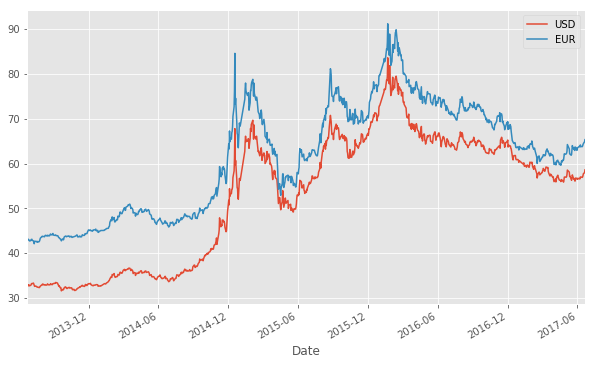

In [5]:
df.set_index('Date', inplace=True)

df[['USD','EUR']].plot()

## Задание 1.5

Найдите среднее значение курса евро в мае 2017 года.

In [6]:
df.loc['2017-05','EUR'].mean()

62.95527368421053

# Продвинутый уровень

*Для получения положительной оценки нужно правильно выполнить не менее 3 заданий из 5*

## Задание 2.1

Найдите долю дней, когда доллар растет.

In [25]:
from __future__ import division
#df.drop(['_USD_'],axis=1,inplace=True)
#print df[1:]

df['_USD_'] = 0.0
cnt = df.USD.count()
for i in xrange(0,cnt-1):
    df['_USD_'][i] = df.loc[df.index>df.index.min()]['USD'][i]

df['Delta'] = df['_USD_'] - df['USD']

print (df.Delta > 0).mean()

0.526315789474


## Задание 2.2

Постройте гистограмму доходности доллара.

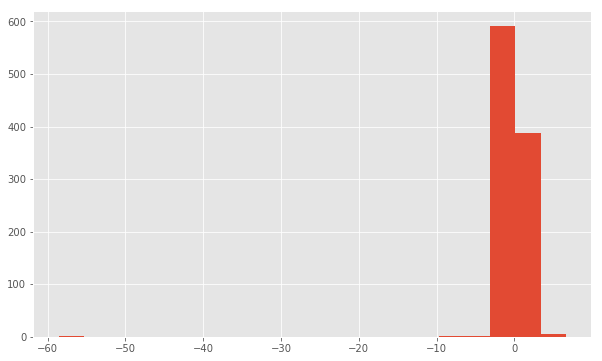

In [35]:
df.loc[df.Delta.notnull(), 'Delta'].hist(bins=20)

## Задание 2.3

Добавьте в таблицу новую колонку `Weekday` – день недели на русском языке, т.е. строку со значением `u'понедельник'`, `u'вторник'` и т.д. (*Hint: удобно воспользоваться атрибутом* `.dt`)

In [63]:
df['Weekday'] = df.index
df.Weekday = df.Weekday.dt.dayofweek

df.replace({'Weekday' : {0 : u'понедельник', 1 : u'вторник', 2 : u'среда', 3 : u'четверг', 4 : u'пятница', 5 : u'суббота', 6 : u'воскресенье'}}).Weekday

Date
2013-06-22    суббота
2013-06-25    вторник
2013-06-26      среда
2013-06-27    четверг
2013-06-28    пятница
               ...   
2017-06-15    четверг
2017-06-16    пятница
2017-06-17    суббота
2017-06-20    вторник
2017-06-21      среда
Name: Weekday, dtype: object

## Задание 2.4

Рассчитайте корреляцию между курсами доллара и евро за весь доступный период (*Hint: в pandas уже встроена функция для расчета корреляций*).

In [76]:
df[['USD','EUR']].corr(method='pearson', min_periods=1)

,USD,EUR
USD,1.000000,0.982309
EUR,0.982309,1.000000


## Задание 2.5

Несколько лет назад курс евро отличался от курса доллара значительно сильнее, чем сейчас. Чтобы это визуализировать, вычислите курс евро к доллару (т.е. "сколько долларов стоит один евро") за каждый день. Постройте график курса евро к доллару за весь доступный период.

# Сложный уровень

*Для получения положительной оценки нужно правильно выполнить не менее 3 заданий из 5*

## Задание 3.1

Загрузите второй лист (`oil`) из файла `data.xlsx` в `pd.DataFrame` (в этой таблице приведены цены за баррель нефти Brent в долларах США).

## Задание 3.2

Объедините обе таблицы в одну. Итоговая таблица должна содержать дату в качестве индекса, а также поля `USD` (доллар), `EUR` (евро) и `Brent` (нефть). Обратите внимание, что периоды, за которые доступны данные, немного отличаются для курсов валют и для нефти. Нас интересует только тот период, когда и те, и другие данные присутствуют.

## Задание 3.3

- Постройте на одном графике курсы валют и цены не нефть. Поскольку цена на нефть имеет немного другой масштаб, используйте параметр `secondary_y='Brent'` для отображения дополнительной оси $y$ справа.
- Посчитайте попарные корреляции всех трех временных рядов за весь период.

## Задание 3.4

Определите, в какие дни недели лучше покупать евро, а в какие – продавать. Для этого рассчитайте среднюю доходность евро в разные дни недели (т.е. нужно сгруппировать таблицу по дням недели и рассчитать среднее процентное изменение курса евро в каждой группе).

## Задание 3.5

Постройте график "скользящей корреляции" между курсами доллара и евро (таким образом можно найти периоды, когда курсы коррелировали слабее обычного и использовать это для арбитража). Для этого нужно взять скользящее окно (например, 60 последних значений) и рассчитать корреляцию USD - EUR внутри каждого такого окна.